In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

In [2]:
mnist = keras.datasets.mnist
mnist

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
print('shape of training dataset\t',x_train.shape)
print('shape of testing dataset\t',x_test.shape)

shape of training dataset	 (60000, 28, 28)
shape of testing dataset	 (10000, 28, 28)


<Figure size 300x300 with 0 Axes>

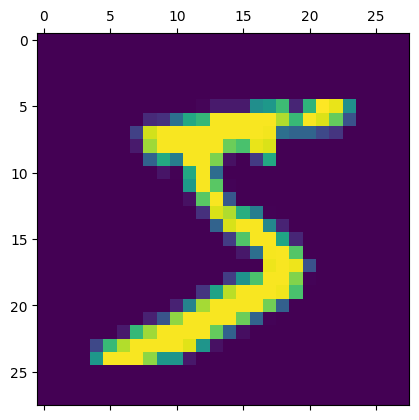

<Figure size 300x300 with 0 Axes>

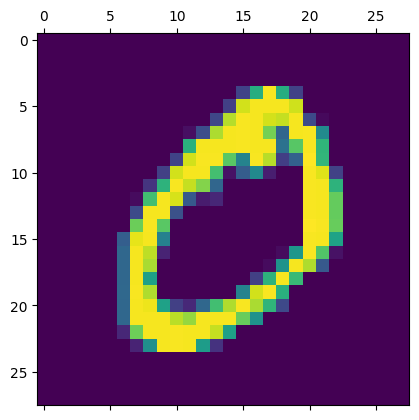

<Figure size 300x300 with 0 Axes>

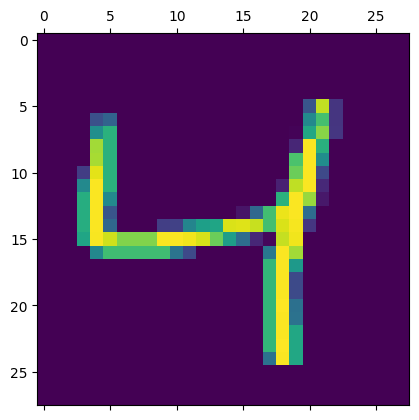

<Figure size 300x300 with 0 Axes>

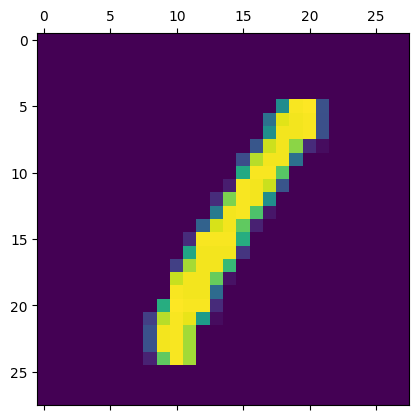

In [5]:
for i in range(4):
  plt.figure(figsize=(3,3))
  plt.matshow(x_train[i])
  plt.show()

In [6]:
x_train = keras.utils.normalize(x_train)
x_test = keras.utils.normalize(x_test)

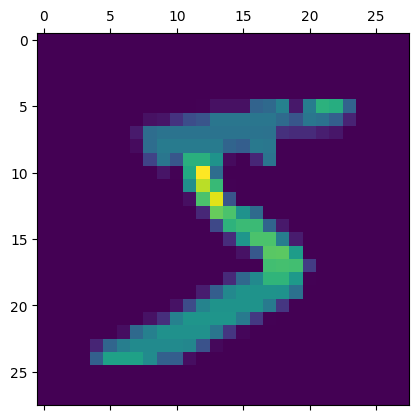

In [7]:
plt.matshow(x_train[0])
plt.show()

In [8]:
print(y_train[0])

5


In [9]:
x_trainr = x_train.reshape(-1,28,28,1) # increasing 1 dimension for kernel filter operation
x_testr = x_test.reshape(-1,28,28,1)
print('training shape',x_trainr.shape)
print('testing shape',x_trainr.shape)


training shape (60000, 28, 28, 1)
testing shape (60000, 28, 28, 1)


In [10]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation,Dropout
from tensorflow.keras.models import Sequential

In [11]:
# creating our neural network

model = Sequential()

# first convolutional layer
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# second convolutional layer
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd convolutional layer
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# fully connected layer 1

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))


# fully connected layer 2
model.add(Dense(32))
model.add(Activation('relu'))


# end layer

# fully connected layer 2
model.add(Dense(10))
model.add(Activation('softmax'))

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.7941 - loss: 0.6124 - val_accuracy: 0.9753 - val_loss: 0.0850
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 76s 44ms/step - accuracy: 0.9673 - loss: 0.1090 - val_accuracy: 0.9765 - val_loss: 0.0717
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.9774 - loss: 0.0747 - val_accuracy: 0.9822 - val_loss: 0.0566
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 87s 47ms/step - accuracy: 0.9817 - loss: 0.0585 - val_accuracy: 0.9865 - val_loss: 0.0474
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 77s 44ms/step - accuracy: 0.9865 - loss: 0.0418 - val_accuracy: 0.9865 - val_loss: 0.0457


In [15]:
test_loss,test_acc = model.evaluate(x_testr,y_test)
print('testing accuracy',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9814 - loss: 0.0668
testing accuracy 0.9847000241279602


In [16]:
y_pred = model.predict(x_testr)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [17]:
y_pred[0].argmax()

np.int64(7)

In [18]:
y_test[0]

np.uint8(7)

In [19]:
results = []

for i in y_pred:
  results.append(i.argmax())
results = np.array(results)

<Axes: >

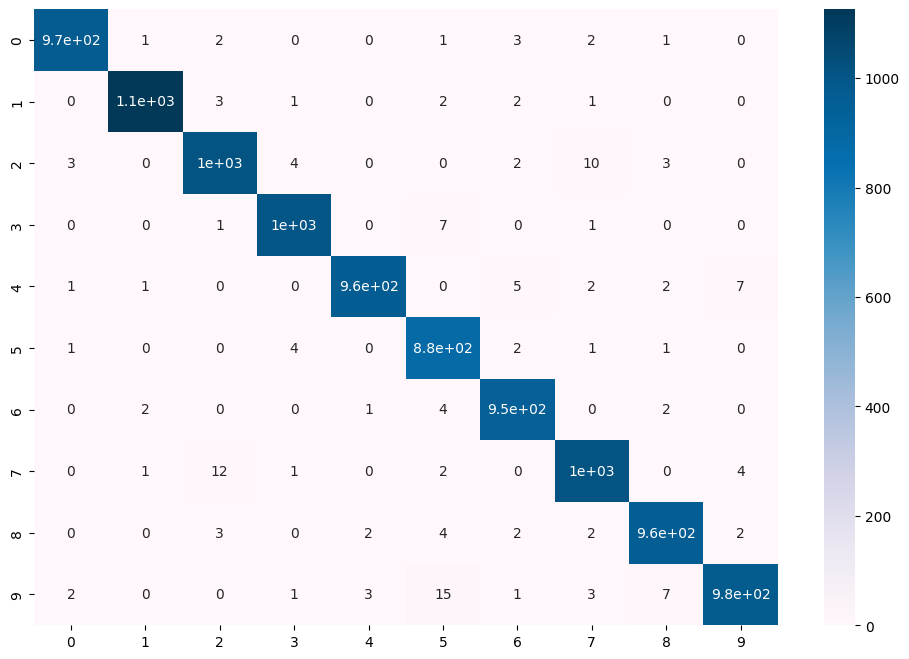

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,results,labels=[0,1,2,3,4,5,6,7,8,9])
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(pd.DataFrame(cm),cmap='PuBu',annot=True)

In [21]:
import cv2

In [28]:
# img = cv2.imread('eight.png')
# plt.matshow(img)

# # no need to resize
# # otherwise

# # resized = cv2.resize(img,(28,28))
# # plt.matshow(resized)

# img.shape
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# plt.matshow(gray)

In [29]:
# # imgr = keras.utils.normalize(img,axis=1)
# # # for kernel operation

# # imgr = imgr.reshape(-1,28,28,1)

# # imgr.shape

# gray.shape

# resize = cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
# resize.shape

In [30]:
# img = keras.utils.normalize(resize,axis=1)
# img.shape

In [31]:
# img = np.array(img).reshape(-1,28,28,1)
# img.shape

In [32]:
# PREDICT = model.predict(imgr)

In [33]:
# np.argmax(PREDICT)

In [34]:
img = cv2.imread('eight.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resize = cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA)
resize = resize.astype('float32') / 255.0
input_img = resize.reshape(-1, 28, 28, 1)

PREDICT = model.predict(input_img)
print(np.argmax(PREDICT))  # Should return 8 (if prediction is correct)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
8
